#### Download Data From Kaggle API

In [2]:
# !kaggle competitions download -c customer-churn-prediction-2020


  0%|          | 0.00/154k [00:00<?, ?B/s]
100%|##########| 154k/154k [00:00<00:00, 4.65MB/s]


In [5]:
# !unzip Data/customer-churn-prediction-2020.zip -d Data

Archive:  Data/customer-churn-prediction-2020.zip
  inflating: Data/sampleSubmission.csv  
  inflating: Data/test.csv           
  inflating: Data/train.csv          


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py 
import plotly.graph_objs as go 
from plotly.subplots import make_subplots
import plotly.figure_factory as ff 
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import warnings

warnings.filterwarnings("ignore")
py.init_notebook_mode(connected=True) 
%matplotlib inline

In [96]:
import imp
imp.reload(customviz)

<module 'customviz' from 'C:\\Storage\\MarketingDataScience\\Churn Prediction\\customviz.py'>

#### EDA

In [122]:
data=pd.read_csv("Data/train.csv")
data.head(5)

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [123]:
data['churn_flag']=data.apply(lambda x:1 if x['churn']=='yes' else 0,axis=1)

In [45]:
#Check for missing values, size of dataset, column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [47]:
# number of unique values by column
data.nunique()

state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
Churn_flag                          1
churn_flag                          2
dtype: int64

#### EDA

In [110]:

customviz.configure_plotly_browser_state()
init_notebook_mode(connected=False)

customviz.pie_chart(data,col='churn',plot_title='Customer Churn: Training Data')

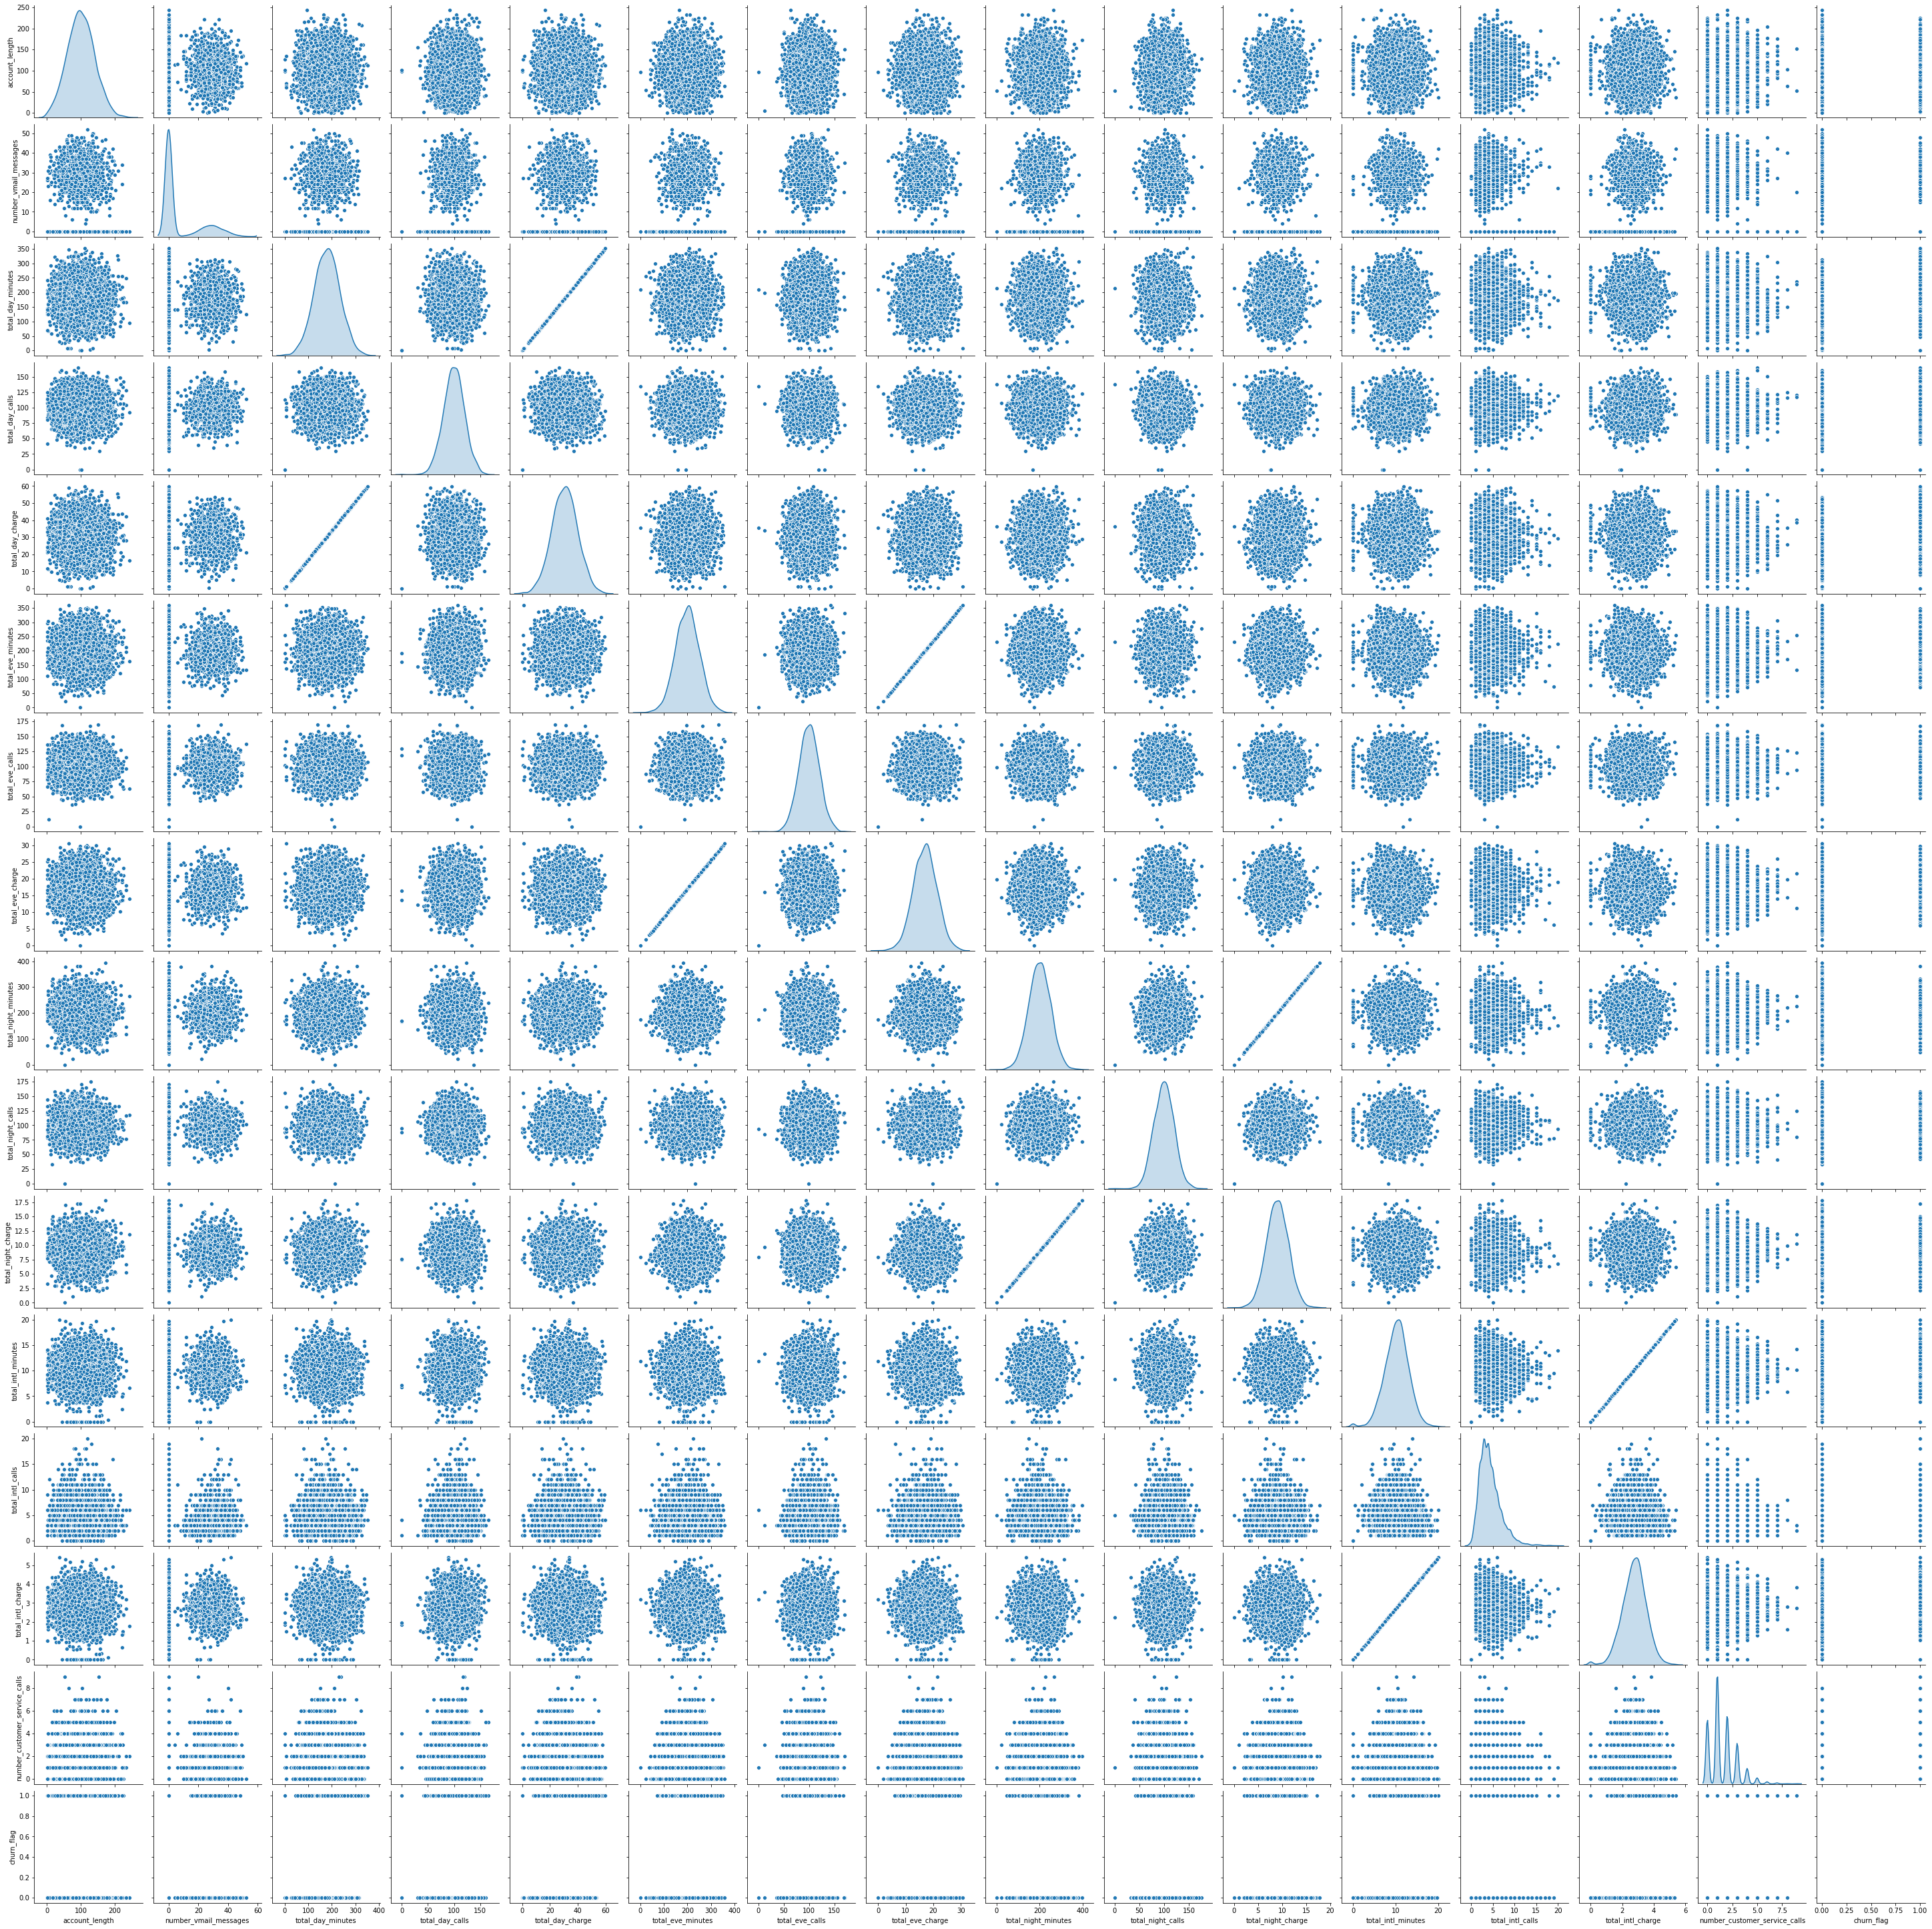

In [139]:
#Categorical feature level cut-off
nlevels_cat_cutoff = 6

#Separating columns to be visualized
cat_cols = list(set(data.nunique()[data.nunique()<nlevels_cat_cutoff].keys().tolist()
                    + data.select_dtypes(include='object').columns.tolist()))
num_cols = [x for x in data.columns if x not in cat_cols] 

#KDE Pair wise plot to visualize distributions & identify correlations
sns.pairplot(data[num_cols+ ['churn_flag']], diag_kind="kde")
plt.show()

In [114]:
customviz.summary_tbl(data,plot_title="Variable Summary")

In [135]:
import imp
imp.reload(customviz)

customviz.corr_plot(data,plot_title='Correlation of Variables')

#### TSNE low dimensional visualization

In [140]:
num_cols

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [141]:
#Drop highly correlated columns
corelated_cols_to_drop=['total_day_minutes','total_eve_minutes','total_intl_minutes','total_night_minutes']

In [144]:
data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'churn_flag'],
      dtype='object')

In [147]:
from sklearn.manifold import TSNE
X = data[[col for col in num_cols if col not in corelated_cols_to_drop]]
Y= data['churn_flag']
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

tsne_data = pd.DataFrame(X_embedded, columns = ["C1", "C2"])
tsne_data = tsne_data.merge(Y, left_index=True, right_index=True, how="left")
tsne_data["Churn_retained"] = tsne_data["churn_flag"].replace({1: "Churn", 0: "Retained"})

layout = go.Layout(dict(title = "Visualizing TSNE low dimensional components",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "first embedded component (C1)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Second embedded component (C2)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        height = 400
                       )
                  )

trace1 = go.Scatter(x = tsne_data.query("Churn_retained=='Churn'")["C1"],
                        y = tsne_data.query("Churn_retained=='Churn'")["C2"],
                        name = 'Churned', mode = "markers",
                        marker = dict(color = 'red', line = dict(width = .5), symbol = "diamond-open"),
                       )
trace2 = go.Scatter(x = tsne_data.query("Churn_retained=='Retained'")["C1"],
                        y = tsne_data.query("Churn_retained=='Retained'")["C2"],
                        name = 'Retained', mode = "markers",
                        marker = dict(color = 'royalblue', line = dict(width = .5), symbol = "diamond-open"),
                       )
fig = go.Figure(data=[trace2, trace1], layout=layout)
py.iplot(fig)

In [148]:
from sklearn.decomposition import PCA

X = data[[col for col in num_cols if col not in corelated_cols_to_drop]]
Y= data['churn_flag']
X_embedded = PCA(n_components = 2).fit_transform(X)


pca_data = pd.DataFrame(X_embedded, columns = ["C1", "C2"])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how="left")
pca_data["Churn_retained"] = pca_data["churn_flag"].replace({1: "Churn", 0: "Retained"})

layout = go.Layout(dict(title = "Visualizing PCA low dimensional components",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "first Principal component (PC1)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Second Principal component (PC2)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        height = 400
                       )
                  )

trace1 = go.Scatter(x = pca_data.query("Churn_retained=='Churn'")["C1"],
                        y = pca_data.query("Churn_retained=='Churn'")["C2"],
                        name = 'Churned', mode = "markers",
                        marker = dict(color = 'red', line = dict(width = .5), symbol = "diamond-open"),
                       )
trace2 = go.Scatter(x = pca_data.query("Churn_retained=='Retained'")["C1"],
                        y = pca_data.query("Churn_retained=='Retained'")["C2"],
                        name = 'Retained', mode = "markers",
                        marker = dict(color = 'royalblue', line = dict(width = .5), symbol = "diamond-open"),
                       )
fig = go.Figure(data=[trace2, trace1], layout=layout)
py.iplot(fig)

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = data[[col for col in num_cols if col not in corelated_cols_to_drop]]
Y= data['churn_flag']

pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 2))])
X_embedded = pipe.fit_transform(X_scaled)


pca_data = pd.DataFrame(X_embedded, columns = ["C1", "C2"])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how="left")
pca_data["Churn_retained"] = pca_data["churn_flag"].replace({1: "Churn", 0: "Retained"})

layout = go.Layout(dict(title = "Visualizing PCA low dimensional components",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "first Principal component (PC1)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Second Principal component (PC2)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        height = 400
                       )
                  )

trace1 = go.Scatter(x = pca_data.query("Churn_retained=='Churn'")["C1"],
                        y = pca_data.query("Churn_retained=='Churn'")["C2"],
                        name = 'Churned', mode = "markers",
                        marker = dict(color = 'red', line = dict(width = .5), symbol = "diamond-open"),
                       )
trace2 = go.Scatter(x = pca_data.query("Churn_retained=='Retained'")["C1"],
                        y = pca_data.query("Churn_retained=='Retained'")["C2"],
                        name = 'Retained', mode = "markers",
                        marker = dict(color = 'royalblue', line = dict(width = .5), symbol = "diamond-open"),
                       )
fig = go.Figure(data=[trace2, trace1], layout=layout)
py.iplot(fig)

In [177]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = data[[col for col in num_cols if col not in corelated_cols_to_drop]]
Y= data['churn_flag']

pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 3))])
X_embedded = pipe.fit_transform(X_scaled)


pca_data = pd.DataFrame(X_embedded, columns = ["C1", "C2","C3"])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how="left")
pca_data["Churn_retained"] = pca_data["churn_flag"].replace({1: "Churn", 0: "Retained"})

layout = go.Layout(dict(title = "Visualizing PCA low dimensional components",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "first Principal component (PC1)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Second Principal component (PC2)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        

                        height = 800
                       )
                  )

trace1 = go.Scatter3d(x = pca_data.query("Churn_retained=='Churn'")["C1"],
                      y = pca_data.query("Churn_retained=='Churn'")["C2"],
                      z=pca_data.query("Churn_retained=='Churn'")["C3"],
                        name = 'Churned', mode = "markers",
                        marker = dict(size=3,color = 'red', line = dict(width = .5), symbol = "diamond-open")
                       )
trace2 = go.Scatter3d(x = pca_data.query("Churn_retained=='Retained'")["C1"],
                    y = pca_data.query("Churn_retained=='Retained'")["C2"],
                    z = pca_data.query("Churn_retained=='Retained'")["C3"],
                        name = 'Retained', mode = "markers",
                        marker = dict(size=3,color = 'royalblue', line = dict(width = .5), symbol = "diamond-open"),
                       )
fig = go.Figure(data=[trace2, trace1], layout=layout)
py.iplot(fig)

In [36]:
data.groupby(['churn','churn_flag']).number_vmail_messages.sum()

churn  churn_flag
no     0             29864
yes    1              2571
Name: number_vmail_messages, dtype: int64

In [37]:
import customviz

international_plan
no     3854
yes     396
dtype: int64


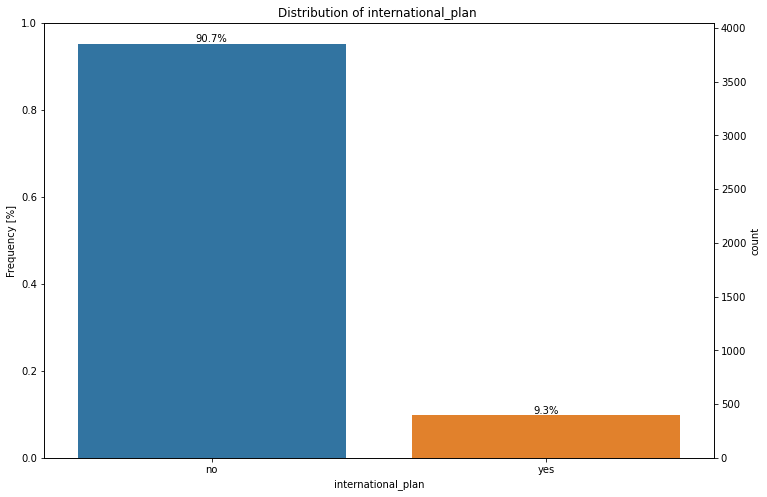

In [41]:
customviz.var_freq_plot(data,['international_plan'])

#### Models required

Logistic Regression: basic linear classifier (good to baseline)
Random Forest: ensemble bagging classifier
K-Nearest Neighbors: instance based classifier
Support Vector Machines: maximum margin classifier
Gaussian Naive Bayes: probabilistic classifier
XGBoost: ensemble (extreme!) boosting classifier

In [156]:
ref: https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0

SyntaxError: invalid syntax (<ipython-input-156-20c9aa294a8b>, line 1)

In [ ]:
https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

In [ ]:
https://www.machinelearningplus.com/machine-learning/evaluation-metrics-classification-models-r/